In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pll
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
import pmdarima as pm

# ads.csv

## Data


In [ ]:
!wget 'https://www.dropbox.com/s/8ufl9gm4d7anbm2/ads.csv?dl=0' -O ./ads.csv

In [ ]:
data_ads = pd.read_csv('/content/ads.csv', sep = ',', parse_dates=['Time'], index_col='Time')
data_ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [ ]:
data_ads.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2017-09-13 00:00:00 to 2017-09-21 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ads     216 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data_ads[:175]
test = data_ads[175:]

## Optimal Hyperparameters

In [ ]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3737.093, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4608.061, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4484.627, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3725.620, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3727.135, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3722.099, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3720.229, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4452.967, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3722.229, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4444.706, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3702.892, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3782.8

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  175
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1844.053
Date:                Wed, 09 Feb 2022   AIC                           3696.105
Time:                        21:24:22   BIC                           3708.764
Sample:                             0   HQIC                          3701.240
                                - 175                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.905e+04   3602.020      5.290      0.000     1.2e+04    2.61e+04
ar.L1          1.4751      0.058     25.509      0.000       1.362       1.588
ar.L2         -0.6313      0.050    -12.604      0.0

In [ ]:
fitted_res = model.arima_res_.get_forecast(41, alpha = 0.05)

## Сonfidence interval

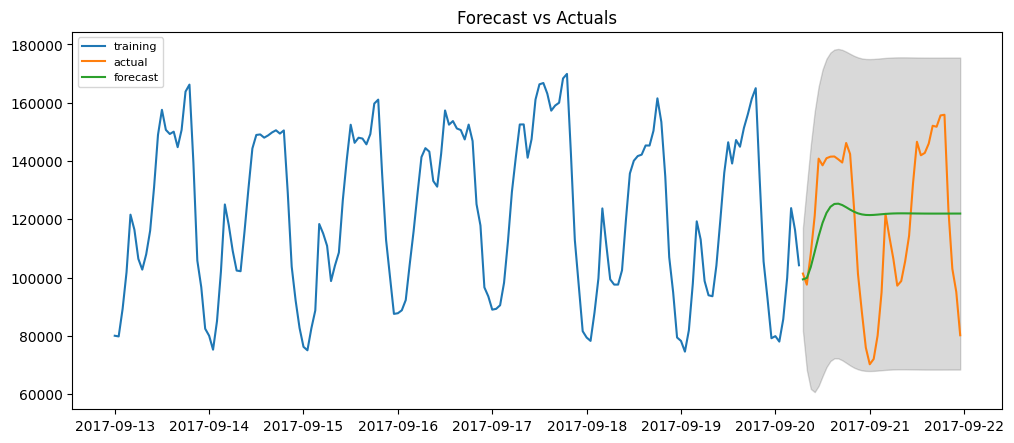

In [ ]:

# Forecast
fc=fitted_res.predicted_mean
se=fitted_res.se_mean
conf=fitted_res.conf_int(alpha=0.05)
 


# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Evaluation

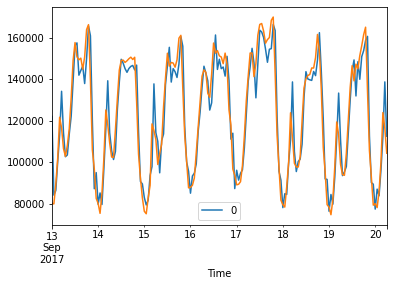

In [ ]:
pd.DataFrame(model.arima_res_.predict(), index=data_ads.index[:175]).plot()
train.Ads.plot()
plt.show()

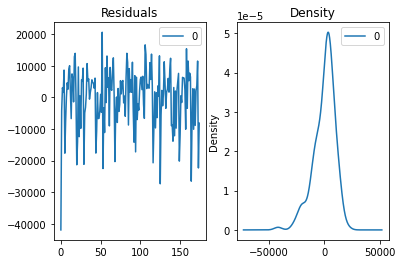

In [ ]:
residuals = pd.DataFrame(model.arima_res_.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# currency.csv

## Data

In [ ]:
data_currency = pd.read_csv('currency.csv', sep = ',', parse_dates=['Time'], index_col='Time')
data_currency.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


In [ ]:
data_currency.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2017-05-01 to 2018-02-24
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   GEMS_GEMS_SPENT  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [ ]:
len(data_currency)*0.9

270.0

In [ ]:
# Create Training and Test
train = data_currency[:270]
test = data_currency[270:]

## Optimal Hyperparameters

In [ ]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7670.650, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8393.501, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7750.220, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8209.786, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7765.384, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7643.432, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8174.192, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7614.380, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7622.266, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7635.687, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7546.127, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=7530.186, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=7

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(8, 0, 4)   Log Likelihood               -3695.918
Date:                Wed, 09 Feb 2022   AIC                           7417.836
Time:                        21:24:48   BIC                           7464.615
Sample:                             0   HQIC                          7436.620
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0296      0.144     -0.205      0.838      -0.313       0.254
ar.L2          0.5725      0.143      3.998      0.000       0.292       0.853
ar.L3          0.7937      0.098      8.064      0.0

In [ ]:
fitted_res = model.arima_res_.get_forecast(30, alpha = 0.05)

## Confidence interval

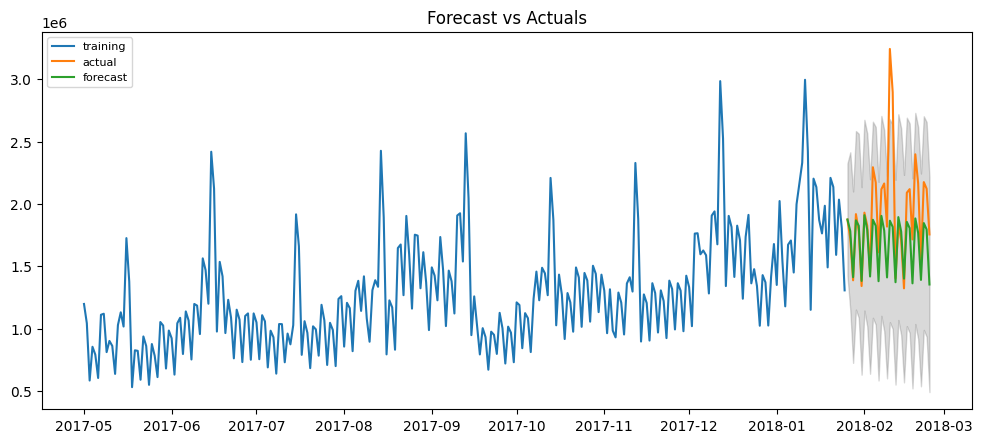

In [ ]:

# Forecast
fc=fitted_res.predicted_mean
se=fitted_res.se_mean
conf=fitted_res.conf_int(alpha=0.05)
 


# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Evaluation

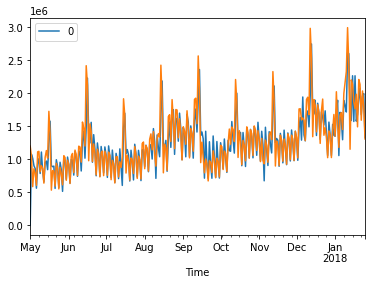

In [ ]:
pd.DataFrame(model.arima_res_.predict(), index=data_currency.index[:270]).plot()
train.GEMS_GEMS_SPENT.plot()
plt.show()

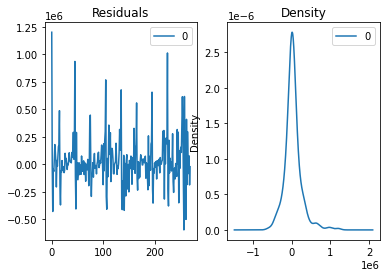

In [ ]:
residuals = pd.DataFrame(model.arima_res_.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()